# Homework 1 (100 points)

This homework focuses on the pandas library and clustering. There are no python library restrictions for this homework. Suggested libraries are pandas, numpy, regex, and sklearn.

## Submission Instructions
**When completing your homework and preparing for the final submission on GitHub, it's important to ensure that you not only push the final .ipynb file but also create a PDF version of the notebook and include it in the repository. This PDF version serves as an essential backup and ensures that your work is easily accessible for grading. Once both the .ipynb and .pdf files are in the GitHub repository, be sure to add a link to the GitHub repository in Gradescope for assessment. `Please note that failing to submit the .pdf file as part of your assignment may result in point deductions, so it's crucial to follow these steps diligently to ensure a complete and successful submission.`**

## Exercise 1 (40 points)

This exercise will use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data). Download the file named `train.csv` and place it in the same folder as this notebook.

The goal of this exercise is to practice using [pandas](https://pypi.org/project/pandas/) methods. If your:

1. code is taking a long time to run
2. code involves for loops or while loops
3. code spans multiple lines (except for `e` and `m`)

look through the pandas documentation for alternatives. This [cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) may come in handy.

#### a) Write a function that reads in a filepath to a csv and returns the DataFrame. (1 point)

In [30]:
import pandas as pd

df = pd.read_csv("train.csv")
print(df)
df.describe()

def train_data_frame():
    df = pd.read_csv("train.csv")
    return df

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

#### b) Write a function that returns the number of rows that have at least one empty column value - (2 points)

In [31]:
def num_nans(df):
    empty_rows = df.isna().any(axis=1).sum()
    return empty_rows

print("there are " +  str(num_nans(df)) + " rows with at least one empty value")

there are 708 rows with at least one empty value


#### c) Write a function that removes all columns with more than 200 NaN values - (2 points)

In [32]:
df = pd.read_csv("train.csv")
def drop_na(df):
    modified = df.drop(df.columns[df.apply(lambda col: col.isnull().sum() > 200)], axis=1)
    return modified 
df = drop_na(df)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

#### d) Write a function that replaces `male` with 0 and `female` with 1 - (2 points)

In [33]:
yay = pd.read_csv("train.csv")
def to_numerical(df):
    df['Sex'] = df['Sex'].replace(['male'],'0')
    df['Sex'] = df['Sex'].replace(['female'],'1')
    return df['Sex']

yay['Sex'] = to_numerical(yay)
yay.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


#### e)  Transforming Names (9 points)

The dataset contains a column called `Name` which consists of names in the following format: "Last Name, Title. First Name Middle Name" (e.g., "Braund, Mr. Owen Harris"). In this question, you will write a Python function to extract and separate various components of the `Name` into four new columns: `First Name`, `Middle Name`, `Last Name`, and `Title`.

Write a Python function named `extract_names(df)` to accomplish this task. The function should take `df` as input and should return the four new columns.

For example, if the original `Name` column contains "Braund, Mr. Owen Harris", the resulting four columns should look like this:

|First Name | Middle Name | Last Name | Title |
|-----------|-------------|-----------|-------|
| Owen      |  Harris     |  Braund   | Mr    |

In [34]:
#from piazza Raul-Fikrat Azizli
def extract_names(df):
    names = df['Name'].str.replace(r'\.|,|de','',regex=True)
    clean_names = names.str.split()

    for i in range(len(clean_names)):
       clean_names[i] = [name for name in clean_names[i] if len(name) > 1]
    normal_titles = ['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms', 'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess', 'Jonkheer']
    for i in range(len(clean_names)):
        current_name = clean_names[i]
        for subname in current_name:
            if subname in normal_titles:
                prev_subnames = current_name[:current_name.index(subname)]
                current_name = [" ".join(prev_subnames)] + [subname] + current_name[current_name.index(subname)+1:]
        if len(current_name) > 4:  
            if '(' in current_name:
                ind = current_name.index('(')
                temp = current_name[:ind]
                if len(temp) < 4:
                    current_name = current_name[:ind] + current_name[ind+1:]
            if len(current_name) > 4:
                current_name = current_name[:4]
        if len(current_name) < 4:
            current_name = current_name + ['']*(4-len(current_name)) 
        clean_names[i] = current_name 
    res = {
        'First Name': [name[2] for name in clean_names],
        'Middle Name': [name[3] for name in clean_names],
        'Last Name': [name[0] for name in clean_names],
        'Title': [name[1] for name in clean_names]
    }
    return pd.DataFrame(res)

df[['First Name', 'Middle Name', 'Last Name', 'Title']] = extract_names(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,John,Bradley,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Jacques,Heath,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr


#### f) Write a function that replaces all missing ages with the average age - (2 points)

In [35]:
yay2 = pd.read_csv("train.csv")
def replace_with_mean(df):
    mean = df.loc[:, 'Age'].mean(axis=0)
    modified = df['Age'].fillna(mean)
    return modified


yay2['Age'] = replace_with_mean(yay2)
yay2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


`The next set of questions focus on visualization. Please use pandas and [matplotlib](https://pypi.org/project/matplotlib/) for all plotting.`

#### g) Plot a bar chart of the average age of those that survived and did not survive. Briefly comment on what you observe. - (1 point)

<AxesSubplot:xlabel='Survival'>

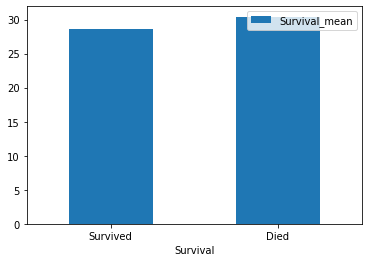

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("train.csv")
df['Age'] = replace_with_mean(df)
survived_mean = df.loc[df['Survived'] == 1, 'Age'].mean()
unsurvived_mean = df.loc[df['Survived'] == 0, 'Age'].mean()
graphdata_frame = pd.DataFrame([('Survived', survived_mean),
                                ('Died', unsurvived_mean)
                                ],columns = ('Survival', 'Survival_mean'))
graphdata_frame.plot.bar(x='Survival', y='Survival_mean', rot=0)



-> your answer here My observation is that there is not that much difference in age between those that survived and those that did not. 

#### h) Plot a bar chart of the proportion that survived for male and female. Briefly comment on what you observe. - (1 point)

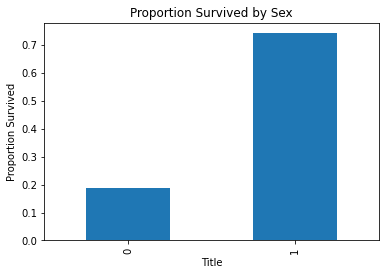

In [37]:
df = pd.read_csv("train.csv")
df['Sex'] = to_numerical(df)
titles_survival = df.groupby('Sex')['Survived'].mean()
titles_survival.plot(kind='bar')
plt.xlabel('Title')
plt.ylabel('Proportion Survived')
plt.title('Proportion Survived by Sex')

pass

-> your answer here Men were much more likely to die than women.

#### i) Plot a bar chart of the proportion that survived for each title. Briefly comment on what you observe. - (2 points)

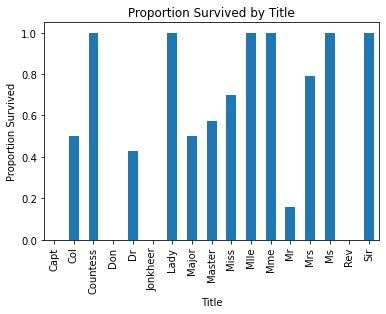

In [38]:
# your code here
import pandas as pd
df = pd.read_csv("train.csv")
df[['First Name', 'Middle Name', 'Last Name', 'Title']] = extract_names(df)
titles_survival = df.groupby('Title')['Survived'].mean()
titles_survival.plot(kind='bar')
plt.xlabel('Title')
plt.ylabel('Proportion Survived')
plt.title('Proportion Survived by Title')


plt.show()


-> your answer here It seems to be little correlation between surviving and their titles.

#### j) Plot a bar chart of the average fare for those that survived and those that did not survive. Briefly comment on what you observe. - (2 points)

<AxesSubplot:xlabel='Survival'>

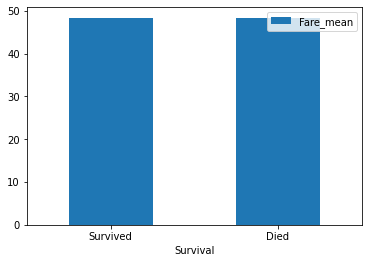

In [39]:
# your code here
df = pd.read_csv("train.csv")
mean_fare_survived = df.loc[df['Survived'] == 1, 'Fare'].mean()
mean_fare_did_not = df.loc[df['Survived'] == 1, 'Fare'].mean()
graphdata_frame = pd.DataFrame([('Survived', mean_fare_survived),
                                ('Died', mean_fare_did_not)
                                ],columns = ('Survival', 'Fare_mean'))
graphdata_frame.plot.bar(x='Survival', y='Fare_mean', rot=0)


-> your answer here It seems that the fare price of those that did survive and those that did not are very similar. There is not much correlation with one another. 

#### k) Create a boxplot for the fare of those that survived and those that did not survive. Briefly comment on what you observe. - (2 points)

<AxesSubplot:title={'center':'Fare'}, xlabel='Survived'>

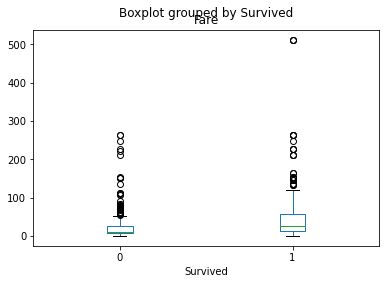

In [40]:
# your code here
df = pd.read_csv("train.csv")
df.boxplot(by ='Survived', column =['Fare'], grid = False) 



-> your answer here You were statistically more likely to survive if you paid a higher fare. However, the median fare is still very similar. 

#### l) Create a function to subtract the mean fare from the actual fare then divide by the standard deviation - (2 points)

In [41]:
# your code here IS THIS WHAT IT MEANS?
import numpy as np
df = pd.read_csv("train.csv")
mean_fare = df['Fare'].mean()
sd = df['Fare'].std()
df.head()
print(mean_fare)
print(sd)

def func(actual, mean, sd):
    result = actual - mean
    return result/sd




32.2042079685746
49.693428597180905


#### m) Remove all non-numerical columns from the dataframe. - (2 points)

In [42]:
df = pd.read_csv("train.csv")
df_numerical = df.select_dtypes(include='number')
print(df_numerical)

     PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0              1         0       3  22.0      1      0   7.2500
1              2         1       1  38.0      1      0  71.2833
2              3         1       3  26.0      0      0   7.9250
3              4         1       1  35.0      1      0  53.1000
4              5         0       3  35.0      0      0   8.0500
..           ...       ...     ...   ...    ...    ...      ...
886          887         0       2  27.0      0      0  13.0000
887          888         1       1  19.0      0      0  30.0000
888          889         0       3   NaN      1      2  23.4500
889          890         1       1  26.0      0      0  30.0000
890          891         0       3  32.0      0      0   7.7500

[891 rows x 7 columns]


#### n) Your task is to write a Python function, `N_most_similar_pairs(df, N)` (10pts)


Please use the dataset created from applying all the above transformations / modifications. This function calculates and returns the names of the N most similar pairs of passengers based on Euclidean distance. Additionally, you should ignore pairs that have a distance of zero.
Here's a step-by-step breakdown of the task:
1. Remove all non-numerical columns from the dataset (including Passenger ID), as we're only interested in numerical attributes for calculating similarity.
2. Calculate the Euclidean distance between each pair of passengers based on their numerical attributes. You can use python's any built-in function for this step.
3. Ignore pairs of passengers that have a distance of zero (meaning they are identical).
4. Find the N most similar pairs of passengers based on their Euclidean distances. These pairs should have the smallest distances.

In [43]:
import pandas as pd
import numpy as np
from itertools import combinations

dur = pd.read_csv("train.csv")

def N_most_similar_pairs(df, N):
    numerical_df = df.select_dtypes(include='number')
    num_passengers = len(numerical_df)
    distances = []
    for i, j in combinations(range(num_passengers), 2):
        row1 = numerical_df.iloc[i].values
        row2 = numerical_df.iloc[j].values
        distance = np.sqrt(np.sum((row1 - row2)**2))
        distances.append((i, j, distance))
    distances = [(i, j, distance) for i, j, distance in distances if distance > 0]
    distances.sort(key=lambda x: x[2]) 
    most_similar_pairs = distances[:N]
    passenger_names = df['Name'].tolist()
    similar_pairs_names = []
    for i, j, _ in most_similar_pairs:
        name1 = passenger_names[i]
        name2 = passenger_names[j]
        similar_pairs_names.append((name1, name2))
    return similar_pairs_names

print("The 3 most similar pairs of passengers are: " + str(N_most_similar_pairs(dur, 3)))

The 3 most similar pairs of passengers are: [('Berriman, Mr. William John', 'Troupiansky, Mr. Moses Aaron'), ('Ali, Mr. William', 'Harmer, Mr. Abraham (David Lishin)'), ('Leeni, Mr. Fahim ("Philip Zenni")', 'Ohman, Miss. Velin')]


## Exercise 2 (40 points)

This exercise will use the `fetch_olivetti_faces` dataset and challenge your understanding of clustering and K-means.

#### a) Using K-means, cluster the facial images into 10 clusters and plot the centroid of each cluster. 

Hint: The centroid of each cluster has the same dimensions as the facial images in the dataset. - (10 points)

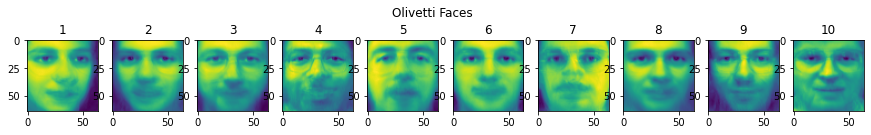

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces(shuffle=True, random_state=42)
faces_data = faces.data
datas = faces_data.data
clusters = 10
kmeans = KMeans(n_clusters=clusters, random_state=42)
kmeans.fit(datas)
centroids = kmeans.cluster_centers_
fig, axes = plt.subplots(1, clusters, figsize=(15, 2))
for i, centroid in enumerate(centroids):
    centroid_image = centroid.reshape(64, 64)  
    axes[i].imshow(centroid_image)
    axes[i].set_title(f'{i+1}')
plt.suptitle('Olivetti Faces')
plt.show()

#### b) Silhouette Scores
Now, let's compare the quality of the clustering obtained through K-means in part `a` with a different clustering generated from the labels attached to each image. Each image in the dataset is associated with a label corresponding to the person's identity. As a result, these labels can naturally generate a clustering where all images of the same person belong to the same cluster (e.g., all images of person A are in cluster A).

Your task is to calculate the silhouette score for the clustering obtained through K-means in part `a` and the clustering generated from the labels attached to each image.
Explain the results and differences in silhouette scores between the two clustering approaches.  - (10 points)

In [45]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
faces = fetch_olivetti_faces(shuffle=True, random_state=42)
faces_data = faces.data
datas = faces_data.data
silhouette = silhouette_score(datas, kmeans.labels_)
clustering = AgglomerativeClustering(n_clusters=10) 
clustering.fit(datas)
label_silhouette_score = silhouette_score(datas, clustering.labels_)

print(f"Kmeans Score: {silhouette}")
print(f"Label Based Clustering Score: {label_silhouette_score}")

Kmeans Score: 0.08106568455696106
Label Based Clustering Score: 0.0852353647351265


-> Your answer here The scores are similar. This means that Kmeans has produced an accurate result which is represented by the label based clustering score. 

#### c) Plot a random image from the `fetch_olivetti_faces` dataset. - (5 points)

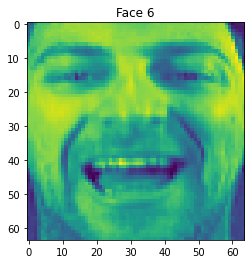

In [58]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
import numpy as np


stuff = fetch_olivetti_faces(shuffle=True, random_state=42)
images = stuff.images
labels = stuff.target
random = np.random.randint(0,len(images))
plt.imshow(images[random])
plt.title(f"Face {labels[random]}")
plt.show()

#### d) By applying K-Means clustering to this dataset, we are clustering for similar facial patterns and features. The centroid of each cluster will represent a facial pattern. You can then replace every pixel in the original image with the centroid of the cluster it was assigned to, thus only using K facial patterns to recreate the image. Using the same image as in c), produce an image that only uses 3 facial patterns (the 3 centroids of the clusters obtained by clustering the image itself using K-Means). - (10 points)

For example, if the left side is your original image, the transfomed image with 3 centroids should look like the right side

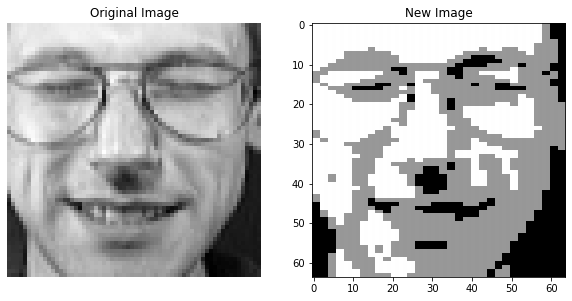

In [54]:
from IPython.display import Image
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt




original = images[random]
original_shape = original.shape
flattened_image = original.reshape(-1, 2)
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_assignments = kmeans.fit_predict(flattened_image)
new_image = kmeans.cluster_centers_[cluster_assignments].reshape(original_shape)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(new_image, cmap='gray')
plt.title("New Image")
plt.show()

#### e) From the code above, write a function that can handle any number of chosen colors. Demonstrate it working on the same picture using 2 colors and 10 colors. - (5pts)

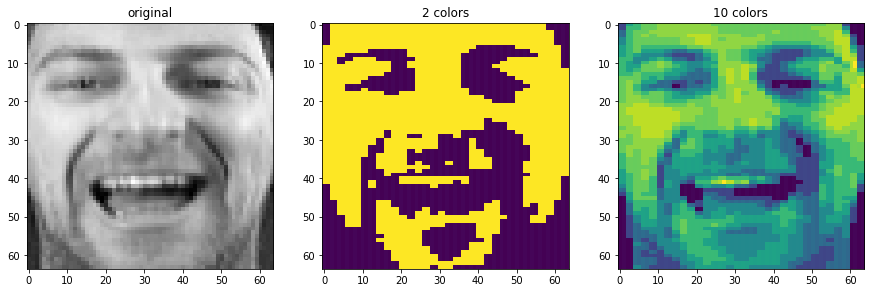

In [60]:
def chosen_color(input_image, colors, colors_array):
    original = input_image.shape
    reshaped = input_image.reshape(-1, 2)
    kmeans = KMeans(n_clusters=colors, init=np.array(colors_array), n_init=1)
    cluster_assignments = kmeans.fit_predict(reshaped)
    new_image = kmeans.cluster_centers_[cluster_assignments].reshape(original)
    return new_image

random_image = images[random]
chosen_colors_2 = [(0, 0), (255, 255)]  
chosen_colors_10 = [(0, 0), (255, 255), (255, 65), (35, 255), (1, 128),(215, 128), (158, 251), (0, 108), (198, 0), (64, 64)]
newimage1 = chosen_color(random_image, 2, chosen_colors_2)
newimage2 = chosen_color(random_image, 10, chosen_colors_10)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(random_image, cmap='gray')
plt.title("original")
plt.subplot(1, 3, 2)
plt.imshow(newimage1)
plt.title("2 colors")
plt.subplot(1, 3, 3)
plt.imshow(newimage2)
plt.title("10 colors")
plt.show()

## Exercise 3 (20pts)

Using the kmeans code from class:

1. Create a 3D dataset. The dataset should be generated randomly (you can pick the variance / covariance) around the following centers: `[[0, 0, 0], [4, 4, 4], [-4, -4, 0], [-4, 0, 0]]` (5pts)
2. Modify the code from class to snapshot 3D images. (15pts) Make sure you:  
    a. use a `view_init` where the clusters and centers can easily be seen  
    b. set the appropriate `xlim`, `ylim` and `zlim` so that the plot doesn't change size

Please display your animation in the notebook (and pdf) in addition to adding it as a file to your repo.

In [61]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

centers = [[0, 0], [2, 2], [-3, 2], [2, -4]]
X, _ = datasets.make_blobs(n_samples=300, centers=centers, cluster_std=1, random_state=0)
np.random.seed(0)
centers = np.array([[0, 0, 0], [4, 4, 4], [-4, -4, 0], [-4, 0, 0]])
n_samples_per_center = 100
X = np.empty((0, 3))

for center in centers:
    data = center + np.random.randn(n_samples_per_center, 3)
    X = np.vstack((X, data))



class KMeans():

    def __init__(self, data, k):
        self.data = data
        self.k = k
        self.assignment = [-1 for _ in range(len(data))]
        self.snaps = []
    
    def snap(self, centers):
        # print(5)
        TEMPFILE = "temp.png"
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        
        ax.scatter(X[:, 0], X[:, 1], X[:,2],c=self.assignment)
        ax.scatter(centers[:,0], centers[:, 1], centers[:, 2],c='r',marker='X', s=200, label='Centroids')
        ax.set_xlabel('x axis')
        ax.set_ylabel('yaxis')
        ax.set_zlabel('z axis')
        ax.set_title(f'KMeans Clustering Cycle: {len(self.snaps)}')
        ax.legend()
        ax.set_xlim(-8, 8)
        ax.set_ylim(-8, 8)
        ax.set_zlim(-8, 8)
        fig.savefig(TEMPFILE)
        # print(TEMPFILE)
        plt.close()
        self.snaps.append(im.fromarray(np.asarray(im.open(TEMPFILE))))

    def initialize(self):
        return self.data[np.random.choice(range(len(self.data)),self.k, replace = False)]
    
    def distance(self,x,y):
        return  np.linalg.norm(x-y)
    
                         
    def assign(self, centers):
        for i in range(len(self.data)):
            delta = [float('inf'),0]
            for j in range(len(centers)):
                distance = self.distance(centers[j],self.data[i])
                if distance<delta[0]:
                    delta[0] = distance 
                    delta[1] = j 
            
            self.assignment[i] = delta[1]


            
    def get_centers(self):
        centers = []
        
        for i in set(self.assignment):
            cluster = []

            for j in range(len(self.data)):
                
                if self.assignment[j] ==i:
                    cluster.append(self.data[j])
            x = 0
            y = 0
            z=0
            for delta in range(len(cluster)):
                x+=cluster[delta][0]
                y+=cluster[delta][1]
                z += cluster[delta][2]
            centers.append([x/len(cluster), y/len(cluster),z / len(cluster)])
        
        return np.array(centers)

            
    def is_diff_centers(self,centers, new_centers):
        n = len(centers)
        flag = 0
        for i in range(n):
            if centers[i][0]!=new_centers[i][0]:
                flag = 1
        
        if flag ==1:
            return True 
        return False



    def lloyds(self):
        # ...
        # print(15)
        centers = self.initialize()
        self.assign(centers)
        self.snap(centers)
        new_centers = self.get_centers()

        while self.is_diff_centers(centers,new_centers):
            # print(10)
            
            self.assign(new_centers)
            centers = new_centers
            self.snap(centers)
            new_centers = self.get_centers()

        
        return 

            

kmeans = KMeans(X, 4)
kmeans.lloyds()
images = kmeans.snaps
images[0].save(
    'kmeans9.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=500
)






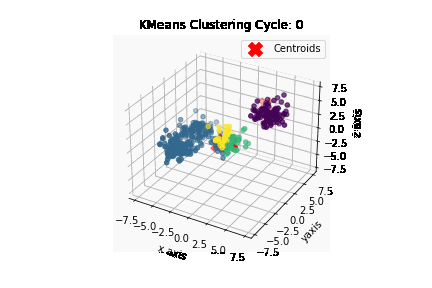

In [50]:
Image(filename='kmeans9.gif')